### 6. Subtract pan-tissue EGs from those of the chosen tissue
Uncommon context-specific EGs (ucsEGs) for a chosen tissue (here `tissueK = 'Kidney'`) are obtained by subtracting the 
pan-tissue EGs computed in the previous step (`df_common`) by the EGs identified for the chosen tissue.

In [4]:
%cd ../data4rev/ucsEGs

/Users/maurizio/HELP/data4rev/ucsEGs


In [14]:
import pandas as pd
import numpy as np

for method in ['ADAM', 'Fiper_consensus', 'HELP']:
    for disease in ['bone', 'Ewing', 'Osteosarcoma', 'Lung', 'LungNeuro', 'NSCLC']:
        df_pancancer = pd.read_csv(f"{method}_PANCancer.csv", index_col=0)
        df_label  = pd.read_csv(f"{method}_{disease}.csv", index_col=0)
        import sys
        np.set_printoptions(threshold=sys.maxsize)
        csEGs = df_label[df_label['label'] == 'E'].index.values
        cEG = df_pancancer[df_pancancer['label']=='E'].index.values
        ucsEGs = np.setdiff1d(csEGs, cEG)
        print(ucsEGs)
        with open(f"ucsEG_{method}_{disease}.txt", 'w', encoding='utf-8') as f:
            f.write('\n'.join(list(ucsEGs)))

['ACIN1' 'ACTR1A' 'ACTR6' 'AK6' 'ALG13' 'ARFRP1' 'ARGLU1' 'ATP6AP2'
 'ATRIP' 'BARD1' 'BCLAF1' 'BNIP1' 'BPTF' 'C18orf21' 'C19orf53' 'CCAR1'
 'CCDC59' 'CCDC86' 'CCND1' 'CDAN1' 'CDIPT' 'CDK4' 'CENPA' 'CENPH' 'CENPL'
 'CHMP4B' 'CHORDC1' 'CMTR1' 'CNOT1' 'COG3' 'COG8' 'COPS3' 'CSNK2B' 'CTU2'
 'CUL1' 'DAP3' 'DBF4' 'DCLRE1B' 'DDX11' 'DDX39B' 'DDX52' 'DHPS' 'DNAAF10'
 'DYNLL1' 'EEFSEC' 'EIF3J' 'EIF4B' 'EIF5A' 'ELP3' 'ELP4' 'ELP5' 'ERCC2'
 'EXOC3' 'EXOSC1' 'FAM133B' 'FEN1' 'FNBP4' 'FNTB' 'FOXD4' 'FXN' 'GABPB1'
 'GAR1' 'GEMIN2' 'GEMIN6' 'GEMIN7' 'GFER' 'GNB1L' 'GPX4' 'GTF2H4' 'GTF3C3'
 'GTF3C4' 'GTF3C5' 'H2AZ1' 'H2BC5' 'HMGA1' 'HNRNPH1' 'HNRNPM' 'HSCB'
 'HTATSF1' 'HUWE1' 'INTS6' 'KDM2A' 'KIF4A' 'KTI12' 'LCE2A' 'LETM1'
 'MAD2L2' 'MCM10' 'MED26' 'METAP1' 'METAP2' 'METTL14' 'METTL3' 'MFN2'
 'MIS18A' 'MLST8' 'MMS19' 'MOCS3' 'MRGBP' 'MRPS5' 'MYBBP1A' 'NAA20' 'NAE1'
 'NAPG' 'NDOR1' 'NDUFAB1' 'NELFB' 'NIPBL' 'NOC3L' 'NRBP1' 'NSMCE3' 'NUBP2'
 'NUMA1' 'NUP153' 'NUP43' 'NUP54' 'NUP62' 'OPA1' 'ORC4' 'PDAP1'

(<Figure size 800x400 with 3 Axes>,
 {'main': <Axes: xlabel='no. Genes', ylabel='ucsEGs'>,
  'right_side_plot': <Axes: >})

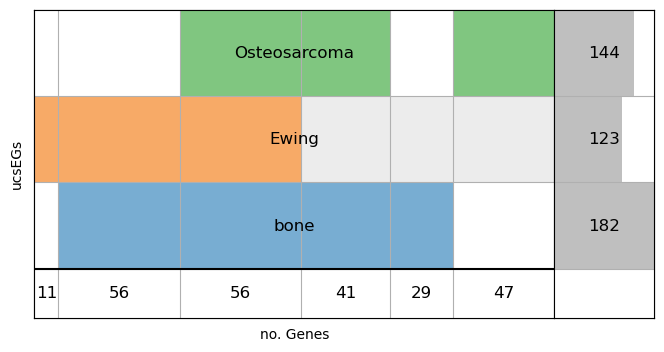

In [36]:
from HELPpy.visualization.plot import svenn_intesect
method = 'ADAM'
disease1 = 'bone'
disease2 = 'Ewing'
disease3 = 'Osteosarcoma'
labels = [disease1, disease2, disease3]
svenn_intesect([set(pd.read_csv(f"ucsEG_{method}_{disease1}.txt", header=None, index_col=0).index.values), 
            set(pd.read_csv(f"ucsEG_{method}_{disease2}.txt", header=None, index_col=0).index.values),
            set(pd.read_csv(f"ucsEG_{method}_{disease3}.txt", header=None, index_col=0).index.values),
            ], labels=labels, ylabel='ucsEGs', figsize=(8,4))


In [44]:

diseases1 = ['bone', 'Ewing', 'Osteosarcoma']
#diseases1 = ['Lung', 'LungNeuro', 'NSCLC']
for method in ['ADAM', 'Fiper_consensus', 'HELP']:
    for disease in diseases1:
        aset = set()
        for rest in filter(lambda x: x != disease, diseases1):
            aset |= set(pd.read_csv(f"ucsEG_{method}_{rest}.txt", header=None, index_col=0).index.values)
        theset = set(pd.read_csv(f"ucsEG_{method}_{disease}.txt", header=None, index_col=0).index.values) - aset
        print(method, disease, len(theset))
        #with open(f"vucsEG_{method}_{disease}.txt", 'w', encoding='utf-8') as f:
        #    f.write('\n'.join(list(theset)))    


ADAM bone 29
ADAM Ewing 11
ADAM Osteosarcoma 47
Fiper_consensus bone 1
Fiper_consensus Ewing 66
Fiper_consensus Osteosarcoma 216
HELP bone 0
HELP Ewing 41
HELP Osteosarcoma 38


##### Visualizing the obtained results
Show the supervenn plot of pan-tissue EGs, Kidney EGs and Kidney ucsEGs.

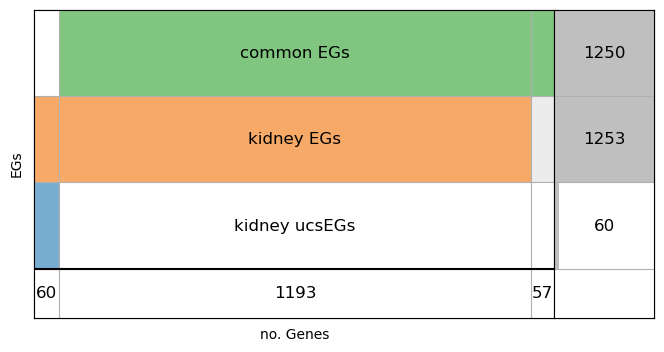

In [10]:
from HELPpy.visualization.plot import svenn_intesect
svenn_intesect([set(ucs_EG_kidney),set(EG_kidney), set(cEG)], labels=['kidney ucsEGs', 'kidney EGs', 'common EGs'], ylabel='EGs', figsize=(8,4))

The plot shows that the Kidney tissue shares 1193 EGs with all the other tissues (over a total of 1250 ucEGs) and has 60 ucsEGs.

Show the supervenn plot of Kidney ucsEGs against Lung ucsEGs.

In [2]:
from HELPpy.visualization.plot import svenn_intesect
from HELPpy.utility.selection import select_cell_lines
from HELPpy.models.labelling import labelling
import numpy as np
import sys
tissueL = 'Lung'
#a) Identify Lung EGs (as in Example 1)
cell_linesL = select_cell_lines(df_nonan, df_map, [tissueL])
print(f"Selecting {len(cell_linesL)} cell-lines")
df_labelL = labelling(df_nonan, columns = cell_linesL, n_classes=2,
                      labelnames={0: 'E', 1: 'NE'},
                      mode='flat-multi', algorithm='otsu')

#b) Compute Lung ucsEGs
np.set_printoptions(threshold=sys.maxsize)
EG_lung = df_labelL[df_labelL['label'] == 'E'].index.values
cEG = df_common[df_common['label']=='E'].index.values
ucs_EG_lung = np.setdiff1d(EG_lung, cEG)
print(ucs_EG_lung)
with open(f"ucsEG_{tissueL.replace('/', '_')}.txt", 'w', encoding='utf-8') as f:
    f.write('\n'.join(list(ucs_EG_lung)))

#Show the supervenn plot
svenn_intesect([set(ucs_EG_kidney), set(ucs_EG_lung)], labels=['kidney', 'lung'], ylabel='ucsEGs', figsize=(8,4))

NameError: name 'df_nonan' is not defined

The plot shows that the Kidney and Lung tissues share 5 ucsEGs. 